In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("bank-full.csv", delimiter=";")

# Drop irrelevant columns
data = data.drop(["duration"], axis=1)

# Replace unknown values with NaN
data = data.replace("unknown", np.nan)
print(data.tail())
# Convert categorical variables to numerical
data["job"] = data["job"].astype("category").cat.codes
data["marital"] = data["marital"].astype("category").cat.codes
data["education"] = data["education"].astype("category").cat.codes
data["default"] = data["default"].astype("category").cat.codes
data["housing"] = data["housing"].astype("category").cat.codes
data["loan"] = data["loan"].astype("category").cat.codes
data["contact"] = data["contact"].astype("category").cat.codes
data["month"] = data["month"].astype("category").cat.codes
data["poutcome"] = data["poutcome"].astype("category").cat.codes
data["y"] = data["y"].astype("category").cat.codes

# Impute missing values with column means
data = data.fillna(data.mean())

# Split into features and target
x = data.drop(["y"], axis=1)
y = data["y"]

       age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov         3     -1         0      NaN  yes  
45207   cellular   17   nov         2     -1         0      NaN  yes  
45208   cellular   17   nov         5    184         3  success  yes  
45209  telephone   17   nov         4     -1         0      NaN   no  
45210   cellular   17   nov         2    188        11    other   no  


In [9]:
# summary of data
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.263321,1.167725,1.060516,0.018027,1362.272058,0.555838,0.160226,-0.223707,15.806419,5.523014,2.763841,40.197828,0.580323,-0.709938,0.116985
std,10.618762,3.256301,0.608230,0.778704,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,3.006911,3.098021,100.128746,2.303441,0.698469,0.321406
min,18.000000,-1.000000,0.000000,-1.000000,0.000000,-8019.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,-1.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,-1.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,8.000000,3.000000,-1.000000,0.000000,-1.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,63.000000,871.000000,275.000000,2.000000,1.000000


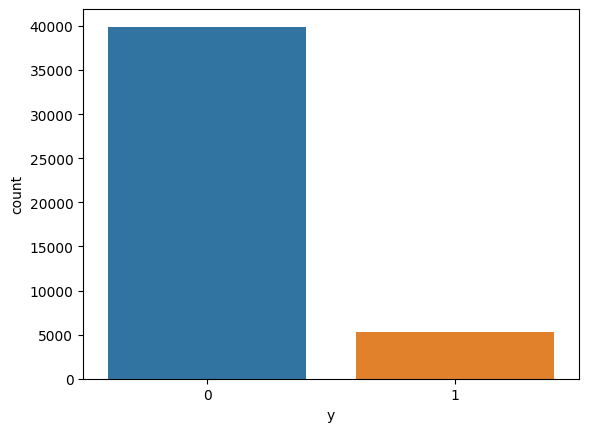

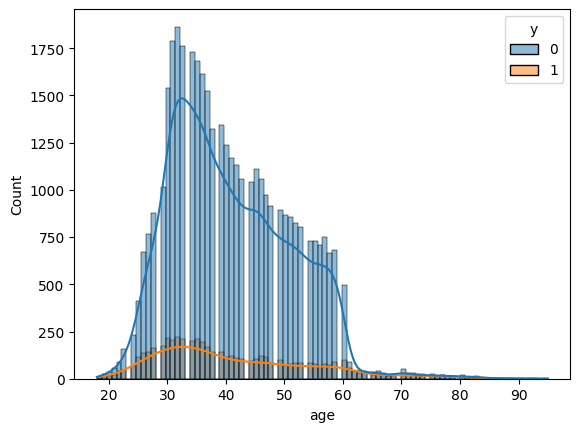

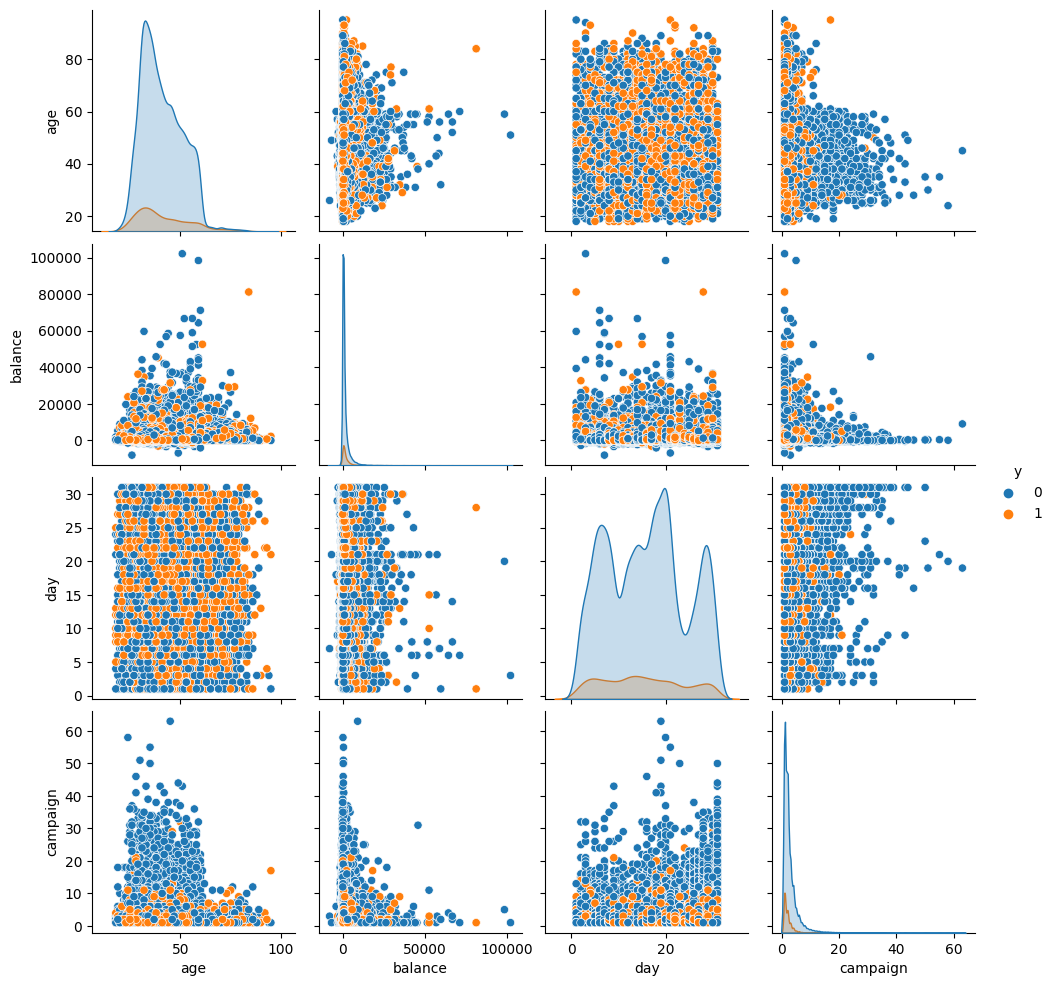

In [10]:
# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data)
plt.show()

sns.histplot(data=data, x="age", hue="y", kde=True)
plt.show()

sns.pairplot(data, vars=["age", "balance", "day", "campaign"], hue="y")
plt.show()

In [4]:
#Value Counts of Categorical Variables
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

for var in cat_vars:
    print(data[var].value_counts())


 1     9732
 4     9458
 9     7597
 0     5171
 7     4154
 5     2264
 6     1579
 2     1487
 10    1303
 3     1240
 8      938
-1      288
Name: job, dtype: int64
1    27214
2    12790
0     5207
Name: marital, dtype: int64
 1    23202
 2    13301
 0     6851
-1     1857
Name: education, dtype: int64
0    44396
1      815
Name: default, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
 0    29285
-1    13020
 1     2906
Name: contact, dtype: int64
8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64
-1    36959
 0     4901
 1     1840
 2     1511
Name: poutcome, dtype: int64


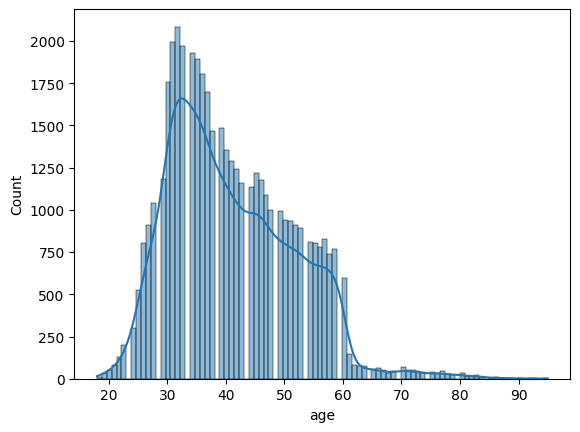

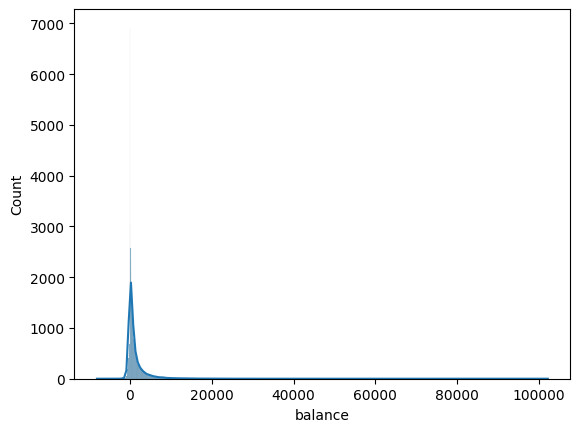

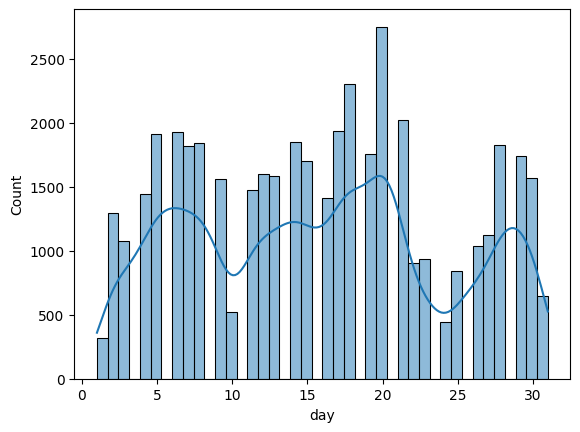

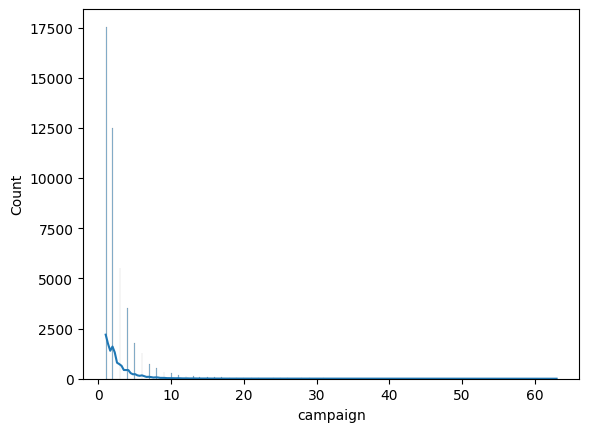

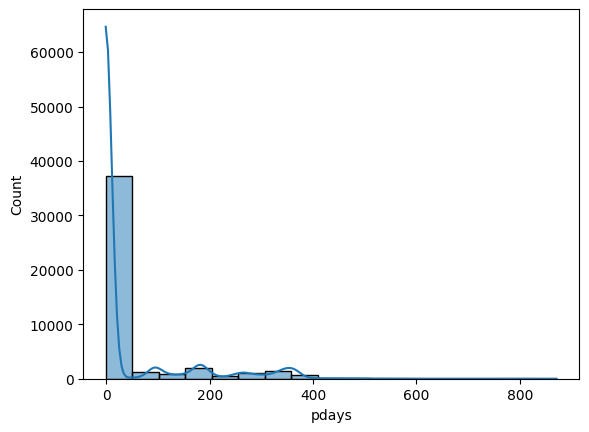

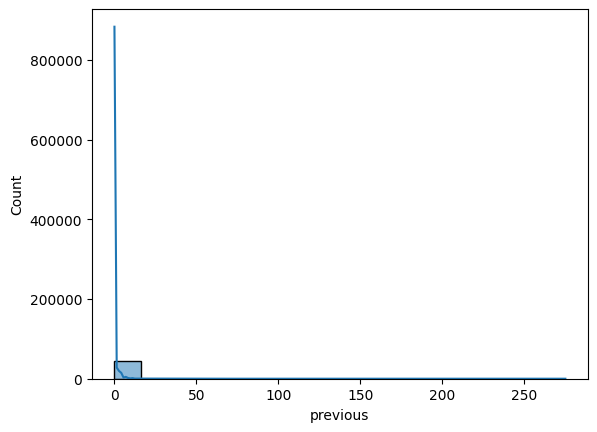

In [14]:
#Distribution of Numeric Variables
numeric_vars = ["age", "balance", "day", "campaign", "pdays", "previous"]

for var in numeric_vars:
    sns.histplot(data[var], kde=True)
    plt.show()


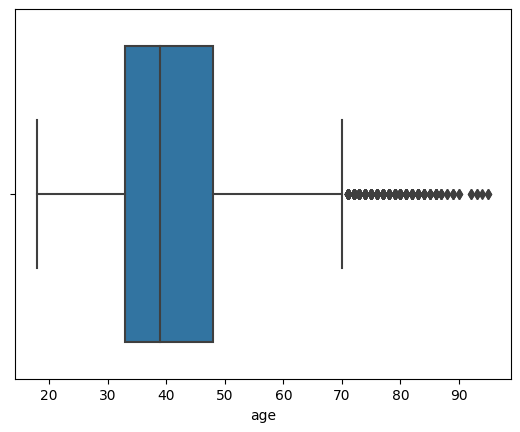

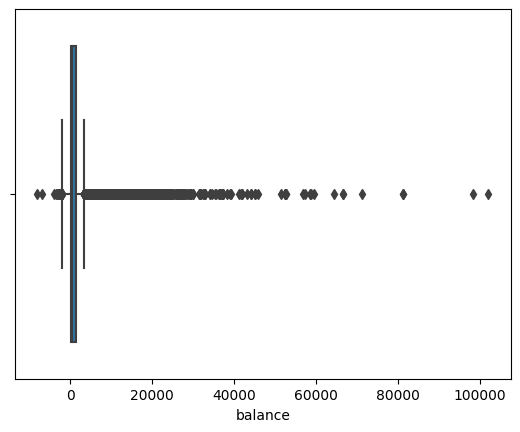

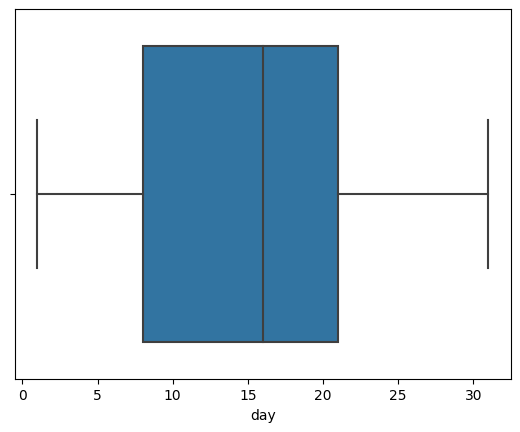

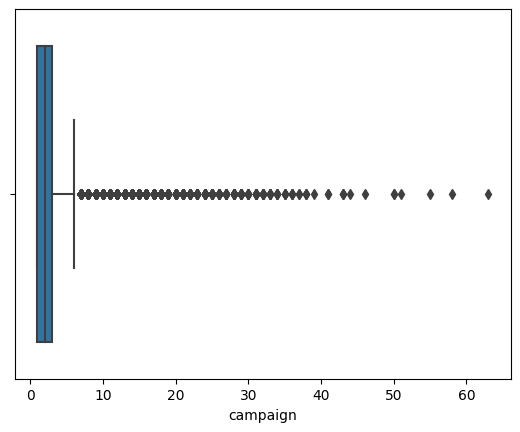

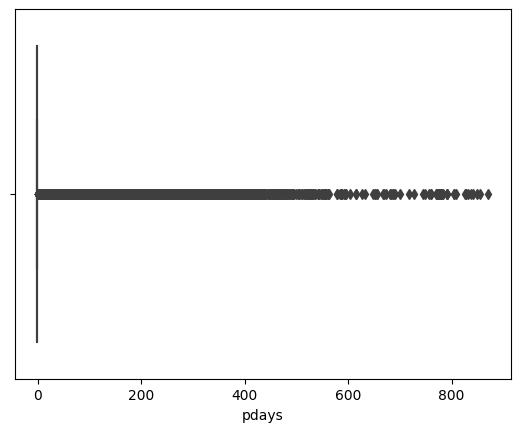

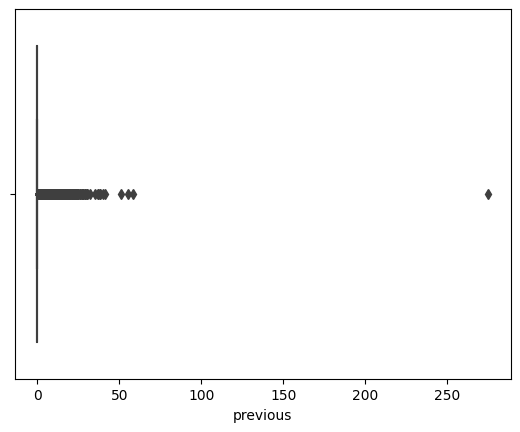

In [15]:
#Outlier Detection
for var in numeric_vars:
    sns.boxplot(x=data[var])
    plt.show()


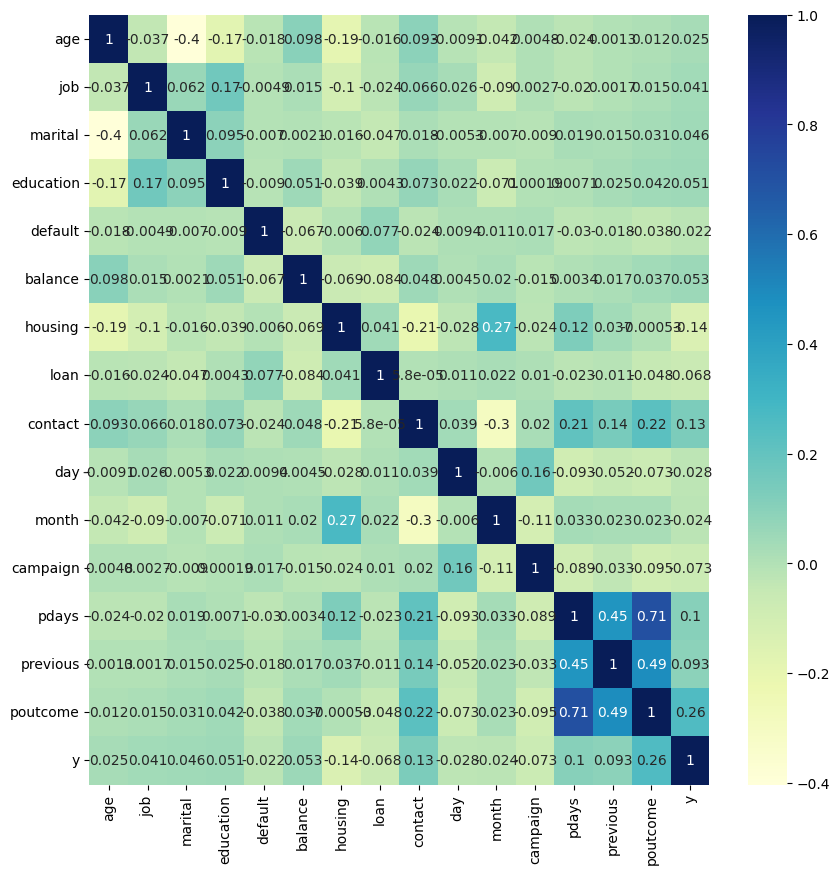

In [11]:
# feature selection, heatmap 
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)
plt.show()


Feature: age, Score: 0.15983
Feature: job, Score: 0.07180
Feature: marital, Score: 0.02760
Feature: education, Score: 0.03721
Feature: default, Score: 0.00276
Feature: balance, Score: 0.19682
Feature: housing, Score: 0.02305
Feature: loan, Score: 0.01199
Feature: contact, Score: 0.02331
Feature: day, Score: 0.13309
Feature: month, Score: 0.09973
Feature: campaign, Score: 0.06049
Feature: pdays, Score: 0.05590
Feature: previous, Score: 0.02871
Feature: poutcome, Score: 0.06774


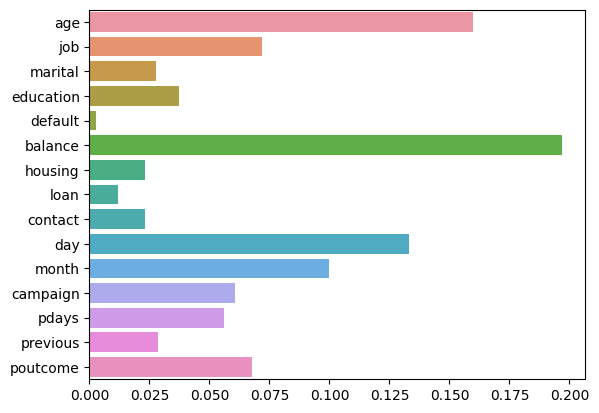

In [12]:
# feature importance visuallization
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x.columns[i],v))
    
sns.barplot(x=importance, y=x.columns)
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier




class Models():

        def get_random_forest_model(self):
          return RandomForestClassifier(n_estimators=100, random_state=2)

        def get_svm_model(self):
          return SVC(kernel='linear', C=0.1, random_state=2)

        def get_xgboost_model(self):
          return XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=2)

        def get_decision_tree_model(self):
          return DecisionTreeClassifier(random_state=2)

In [7]:
# split data and normalizing them
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
scaler = StandardScaler()

# fit scaler on x_train
scaler.fit(x_train)

# transform x_train and x_test using scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = Models()

# Create a list of models to evaluate
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Evaluate each model using cross-validation
for model in model_list:
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print("Model:", type(model).__name__)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)


Model: RandomForestClassifier
CV Scores: [0.89424938 0.89341996 0.89231407 0.89243744 0.89160791]
Mean CV Score: 0.8928057518758008
Model: SVC
CV Scores: [0.88291402 0.88291402 0.88277578 0.88289783 0.88289783]
Mean CV Score: 0.8828798948205361
Model: XGBClassifier
CV Scores: [0.89507879 0.89286702 0.89438761 0.89589382 0.89174616]
Mean CV Score: 0.8939946817800223
Model: DecisionTreeClassifier
CV Scores: [0.82914017 0.82844899 0.82347249 0.82662796 0.83022259]
Mean CV Score: 0.8275824398823917
Model: RandomForestClassifier
Accuracy: 0.8922923808470641
Precision: 0.6047745358090185
Recall: 0.21652421652421652
F1 Score: 0.3188811188811189


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Accuracy: 0.8835563419219286
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Model: XGBClassifier
Accuracy: 0.8945040362711489
Precision: 0.6312997347480106
Recall: 0.22602089268755934
F1 Score: 0.3328671328671328
Model: DecisionTreeClassifier
Accuracy: 0.8318036049983413
Precision: 0.3097560975609756
Recall: 0.36182336182336183
F1 Score: 0.3337713534822602
Best Model: DecisionTreeClassifier
Best F1 Score: 0.3337713534822602


In [ ]:
# hyper parameter engineering
from sklearn.model_selection import GridSearchCV

models = Models()

# Define parameter grid for each model
rf_param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]}
svm_param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
xgb_param_grid = {"learning_rate": [0.1, 0.2, 0.3], "max_depth": [5, 10, 15], "n_estimators": [50, 100, 200]}
dt_param_grid = {"max_depth": [5, 10, 15]}

# Create a list of parameter grids for each model
param_grid_list = [rf_param_grid, svm_param_grid, xgb_param_grid, dt_param_grid]

# Create a list of models to tune
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Perform grid search for each model
best_models = []
for i in range(len(model_list)):
    grid_search = GridSearchCV(estimator=model_list[i], param_grid=param_grid_list[i], cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print("Model:", type(best_model).__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in best_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)


Model: RandomForestClassifier
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best CV Score: 0.8941053241790566
